In [1]:
import numpy as np
import xarray as xr
import glob 

cesm2files = np.sort(glob.glob('/home/disk/pna2/aodhan/CESM2_LENS/DynamicallySeparated/Ensemble_*'))


PSL_data = []
TAS_data = []
arctic_tas_data = []
for file_path in cesm2files:
    xarray = xr.open_dataset(file_path)
    PSL_raw = xarray.PSL.values
    TAS_raw = xarray.TAS.values
    arctic_tas = xarray.Arctic_TAS.values
    PSL_data.append(PSL_raw)
    TAS_data.append(TAS_raw)
    arctic_tas_data.append(arctic_tas)
    xarray.close()

In [2]:
np.shape(PSL_data)

(100, 40, 44, 72, 144)

In [3]:
forced_component = np.nanmean(arctic_tas_data, axis=0)
natural_components = arctic_tas_data - forced_component

In [4]:
print(np.shape(forced_component))

(40, 3, 44)


In [14]:
sample_forced = forced_component[-7,:,:]
print(np.shape(sample_forced))

(3, 44)


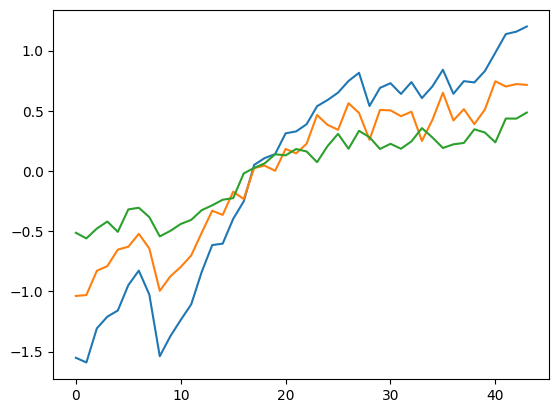

In [13]:
import matplotlib.pyplot as plt
plt.plot(sample_forced[0] - np.nanmean(sample_forced[0]))
plt.plot(sample_forced[1])
plt.plot(sample_forced[2])

This notebook used data that had the dynamic adjustment done on each of the 40 time periods indivisually (i.e., on timeseries of 44 winters). I did not remove the trend
from any of those PSL maps. The results show that the dynamic contribution is the most important at both the early timeperiods (1854-18..) and the later ones (2054-20..). 
This seems wrong, because I would assume when the greenhouse gas signal became strong, local feedbacks would be more important than the dynamics. It may be that by leaving
the trend in the PSL and arctic TAS timeseries, you artifically inflate the importance of the dynamic contribution because the dynamic adjustment is based on correlations
that are anomalously high due to fitting to a trend.